In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv('winequality-red.csv',sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
60,8.8,0.4,0.4,2.2,0.079,19.0,52.0,0.998,3.44,0.64,9.2,5


In [7]:
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

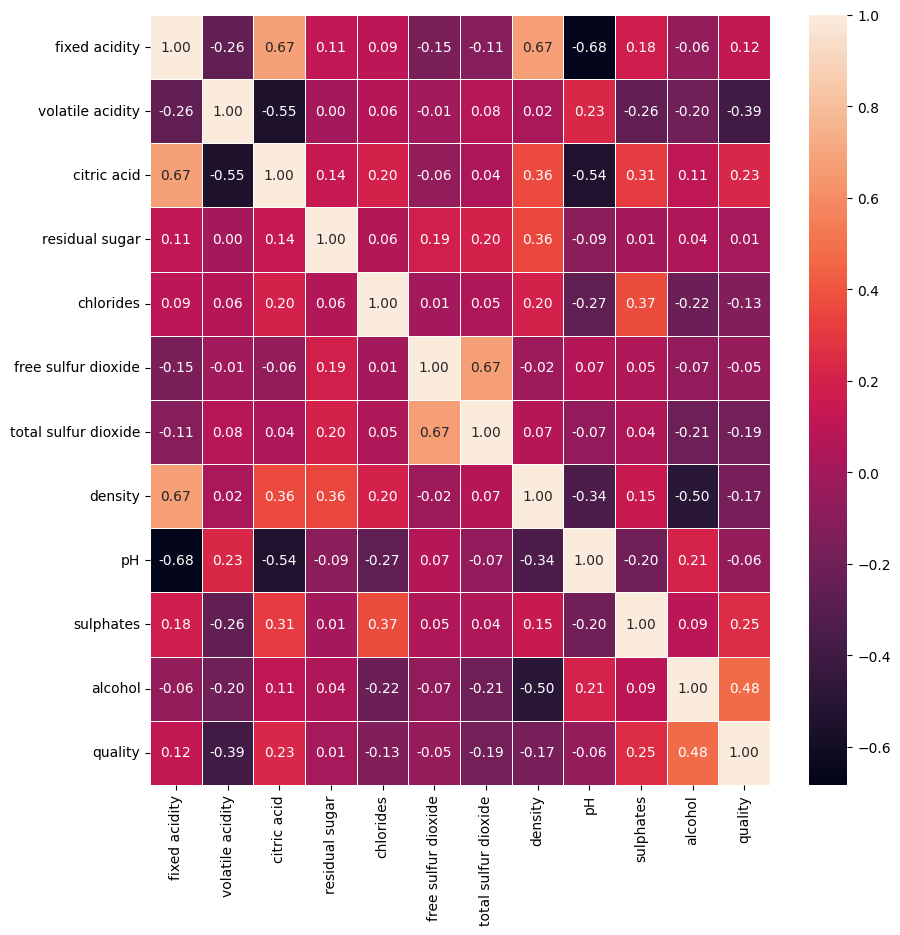

In [8]:
# Plot correlation heatmap
import seaborn as sns # type: ignore
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),ax=ax, annot=True, linewidths=0.7, linecolor='white',fmt='.2f')
plt.savefig('corr.svg', format='svg')

In [9]:
scaler = StandardScaler()

In [10]:
X = df.drop(columns=['quality'])
y = df['quality']
X_train,X_test,y_train,y_test = train_test_split(
    X, y, test_size=0.2, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1279, 11) (1279,)
(320, 11) (320,)


In [11]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_preds = dtc.predict(X_test)
print("Accuracy = ",accuracy_score(y_test, y_preds)*100)

Accuracy =  57.49999999999999


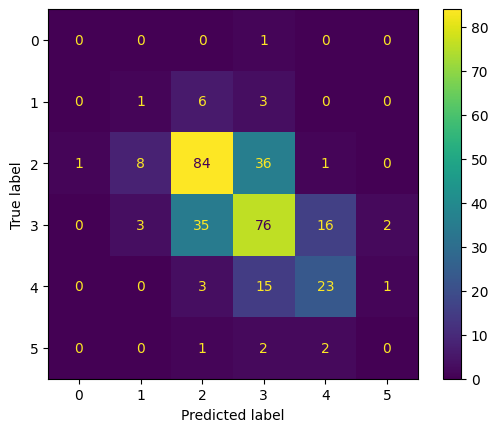

In [12]:
cm = confusion_matrix(y_test, y_preds)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot()

In [13]:
print("Precison = ",precision_score(y_test, y_preds, average='weighted'))

Precison =  0.5747283361018827


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.08      0.10      0.09        10
           5       0.65      0.65      0.65       130
           6       0.57      0.58      0.57       132
           7       0.55      0.55      0.55        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.31      0.31      0.31       320
weighted avg       0.57      0.57      0.57       320



In [15]:
from sklearn.neighbors import  KNeighborsClassifier

In [16]:
aList = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_preds = knn.predict(X_test)
    aList.append(accuracy_score(y_test, y_preds))

Text(0.5, 1.0, 'k vs Accuracy')

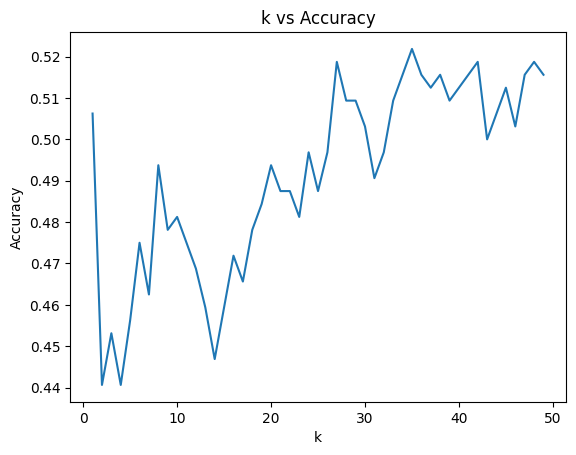

In [17]:
# Plot accuracy vs k
plt.Figure(figsize=(6,4))
plt.plot(range(1,50), aList)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_preds = gnb.predict(X_test)
print("Accuracy = ",accuracy_score(y_test, y_preds)*100)

Accuracy =  55.00000000000001


In [19]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.323690,0.530559,0.272471,2.555473,0.088448,15.876075,46.657154,0.996774,3.311650,0.660023,10.418100
std,1.724243,0.179275,0.195448,1.435790,0.049332,10.313517,32.941962,0.001856,0.154016,0.174605,1.052694
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000
25%,7.100000,0.400000,0.100000,1.900000,0.071000,7.000000,22.000000,0.995655,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,38.000000,0.996800,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997845,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [20]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [21]:
gnb = GaussianNB()
gnb.fit(X_train_transformed, y_train)
y_preds = gnb.predict(X_test_transformed)
print("Accuracy = ",accuracy_score(y_test, y_preds)*100)

Accuracy =  54.6875


In [22]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,1000,100))
mlp.fit(X_train_transformed, y_train)
y_preds = mlp.predict(X_test_transformed)
print("Accuracy = ",accuracy_score(y_test, y_preds))

Accuracy =  0.65625
